In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv ("mammographic_masses_data_clean.csv")

In [4]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


In [6]:
df["Target"].value_counts()

0    427
1    403
Name: Target, dtype: int64

In [7]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


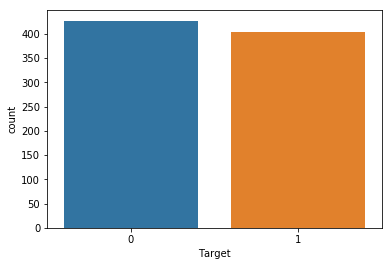

In [8]:
sns.countplot ( x = "Target", data = df )

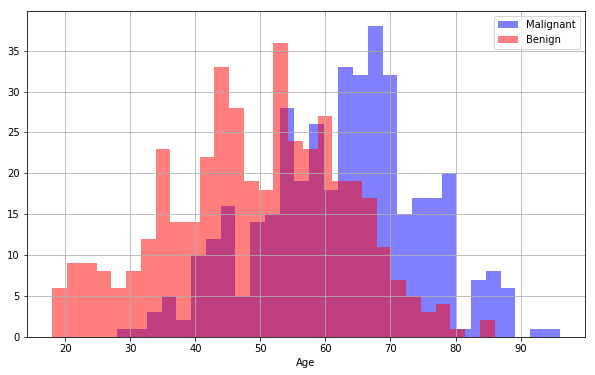

In [14]:
plt.figure(figsize = (10,6))
df[df["Target"] == 1]["Age"].hist(color = "blue",bins = 30, label = "Malignant", alpha = 0.5)
df[df["Target"] == 0]["Age"].hist(color = "red",bins = 30, label = "Benign", alpha = 0.5)
plt.xlabel("Age")
plt.legend()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("Target" , axis = 1)
y = df["Target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
pred = dtree.predict (X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print (classification_report(y_test,pred))
print (confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       140
           1       0.75      0.75      0.75       134

   micro avg       0.75      0.75      0.75       274
   macro avg       0.75      0.75      0.75       274
weighted avg       0.75      0.75      0.75       274

[[106  34]
 [ 34 100]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
pred = rfc.predict (X_test)

print (classification_report(y_test,pred))
print (confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       140
           1       0.76      0.81      0.78       134

   micro avg       0.78      0.78      0.78       274
   macro avg       0.78      0.78      0.78       274
weighted avg       0.78      0.78      0.78       274

[[106  34]
 [ 26 108]]


In [ ]:
We see, improved results after using random forest classifier. Random forest classifier, overshines
when we have large amount of data.